In [1]:
#importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#wordcloud
import wordcloud
from wordcloud import WordCloud

#sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
dataset = pd.read_csv("data.csv")
dataset

,Text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0
...,...,...
162975,crores paid neerav modi recovered congress lea...,-1.0
162976,dear rss terrorist payal gawar modi killing pl...,-1.0
162977,cover interaction forum left,0.0
162978,big project came india modi dream project happ...,0.0


In [3]:
data = dataset[dataset["category"]==-1.0]
data = data.drop(["category"], axis=1)
data = data.dropna()

In [4]:
data

,Text
0,modi promised minimum government maximum gover...
15,vote party leadershipwho take fast firm action...
19,write chowkidar mean anti modi try visit plz u...
21,firm belief leadership shri narendra modi bjp ...
23,sultanpur uttar pradesh loksabha candidate sel...
...,...
162956,narender modi contested two seats member parli...
162962,modi decimates congress front crores congress ...
162967,azamgarh please poor working requirement jogia...
162975,crores paid neerav modi recovered congress lea...


In [40]:
word_frequency = data['Text'].str.split(expand=True).stack().value_counts().reset_index()[:10]
word_frequency.columns = ['Word', 'Frequency'] 
word_frequency

,Word,Frequency
0,modi,34580
1,india,6216
2,people,4015
3,bjp,3546
4,like,3427
5,congress,3372
6,govt,2591
7,poor,2577
8,dont,2304
9,one,2248


# Clustering

In [5]:
#tfidfVectorizer
vectorizer = TfidfVectorizer()

In [6]:
X = vectorizer.fit_transform(data["Text"])

In [7]:
n_cluster = 3

In [8]:
kmeans = KMeans(n_clusters = n_cluster, random_state=0)

In [9]:
cluster_labels = kmeans.fit_predict(X)
data['cluster'] = cluster_labels

In [13]:
for i in range(n_cluster):
    print(f"Cluster {i}")
    print(data[data["cluster"]==i].head(5))
    print("\n")

Cluster 0
                                                    Text  cluster
43398         modi india th country take satellite space        0
43430  modi announces india shot low orbit satellite ...        0
43431  india shot leo low orbit satellite shot asat m...        0
43437  india prime minister modi says india shot live...        0
43441  modi indian scientists used antisatellite miss...        0


Cluster 1
                                                 Text  cluster
0   modi promised minimum government maximum gover...        1
15  vote party leadershipwho take fast firm action...        1
19  write chowkidar mean anti modi try visit plz u...        1
21  firm belief leadership shri narendra modi bjp ...        1
23  sultanpur uttar pradesh loksabha candidate sel...        1


Cluster 2
                                                  Text  cluster
136  achhe din vikas black money jobs thing found p...        2
201  reason demonetization primarily detection blac...        2


In [14]:
data

,Text,cluster
0,modi promised minimum government maximum gover...,1
15,vote party leadershipwho take fast firm action...,1
19,write chowkidar mean anti modi try visit plz u...,1
21,firm belief leadership shri narendra modi bjp ...,1
23,sultanpur uttar pradesh loksabha candidate sel...,1
...,...,...
162956,narender modi contested two seats member parli...,1
162962,modi decimates congress front crores congress ...,1
162967,azamgarh please poor working requirement jogia...,2
162975,crores paid neerav modi recovered congress lea...,2


In [16]:
#CountVectorizer
count = CountVectorizer()

In [29]:
#function WordCloud
def wordcloud(text, title):
    #create wordcloud
    wordcloud = WordCloud(width = 800, height = 600, 
                           background_color ='white',
                           min_font_size = 10).generate(text)
    #set wordcloud figure
    plt.figure()
    #set title for wordcloud
    plt.title(title)
    #show image
    plt.imshow(wordcloud)
    #remove axis
    plt.axis("off")
    #show plot
    plt.show()

# WordCLoud for the cluster1

In [15]:
cluster1= data[data["cluster"]==0]
#len(cluster1["Text"])

765

In [17]:
cluster1

,Text,cluster
43398,modi india th country take satellite space,0
43430,modi announces india shot low orbit satellite ...,0
43431,india shot leo low orbit satellite shot asat m...,0
43437,india prime minister modi says india shot live...,0
43441,modi indian scientists used antisatellite miss...,0
...,...,...
149836,pmoindia shoots leo satellite becomes elite sp...,0
151548,modi jee took satellite space lololol,0
153793,mission shakti india shoots satellite test spa...,0
161272,yep mamta ask modi shot one useless satellite ...,0


In [18]:
X_count = count.fit_transform(cluster1["Text"])
features = count.get_feature_names_out()

In [19]:
X_features = ' '.join(features)

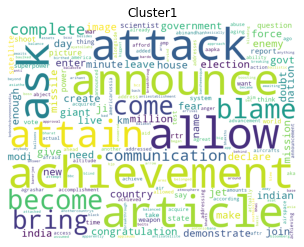

In [30]:
wordcloud(X_features, "Cluster1")

# WordCloud for the cluster2

In [34]:
cluster2= data[data["cluster"]==1]
#len(cluster1["Text"])
cluster2

,Text,cluster
0,modi promised minimum government maximum gover...,1
15,vote party leadershipwho take fast firm action...,1
19,write chowkidar mean anti modi try visit plz u...,1
21,firm belief leadership shri narendra modi bjp ...,1
23,sultanpur uttar pradesh loksabha candidate sel...,1
...,...,...
162945,today also shri kamaraj nadar name shri narend...,1
162948,dear today dared modi debate please tell wont ...,1
162956,narender modi contested two seats member parli...,1
162962,modi decimates congress front crores congress ...,1


In [35]:
count.fit_transform(cluster2["Text"])
features2 = count.get_feature_names_out()
X_features2 = ' '.join(features2)

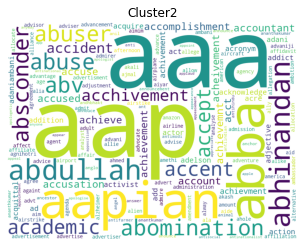

In [36]:
wordcloud(X_features2, "Cluster2")

# WordCloud for the cluster3

In [37]:
cluster3= data[data["cluster"]==2]
#len(cluster1["Text"])
cluster3

,Text,cluster
136,achhe din vikas black money jobs thing found p...,2
201,reason demonetization primarily detection blac...,2
204,prior modi govt took poor people didnt access ...,2
526,hahathis salmasabrina flavor twistsociopath sa...,2
532,kamal haasan takes chowkidar modi kamal haasan...,2
...,...,...
162820,know priyanka position due family rule india l...,2
162857,stupid understanding bringing cash bank saved ...,2
162920,ever invested money life know answer question ...,2
162967,azamgarh please poor working requirement jogia...,2


In [38]:
count.fit_transform(cluster2["Text"])
features3 = count.get_feature_names_out()
X_features3 = ' '.join(features3)

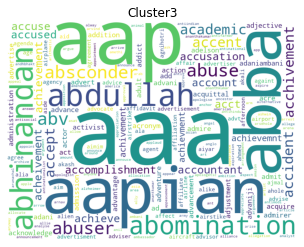

In [39]:
wordcloud(X_features3, "Cluster3")